<a href="https://colab.research.google.com/github/anandsubbu007/Pytorch-Tutorial-Beginner/blob/master/4.CNN_CIFAR10_Part-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN with Tensor

In [0]:
# Importing Libraries
import torch                       # pytorch
import torch.nn as nn              # pytorch for neural network
import numpy as np                 # for algebric functions
import matplotlib.pyplot as plt    # to plot graph

# torch vision package
import torchvision                 # for handling image & has CNN architecture

## Importing Data

In [0]:
trainset = torchvision.datasets.CIFAR10(train=True,download=True,root= "./data",
                                     transform= torchvision.transforms.ToTensor())
#transform --> transform the data during creation (ToTensor())
#download  --> to download to local file
#root      --> data storage place
#train     --> means training data from training set 
type(trainset)

Extracting ./data/cifar-10-python.tar.gz to ./data


torchvision.datasets.cifar.CIFAR10

In [0]:
#class labels [there are 10 lables]
#this is the order of lable of this dataset
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship',' truck' )

## DataLoader

In [0]:
#loading the dataset --> DataLoader class (torch.utils.data.DataLoader)
trainloader = torch.utils.data.DataLoader(trainset)
type(trainloader)

torch.utils.data.dataloader.DataLoader

In [0]:
data_iter = iter(trainloader)
type(data_iter)

torch.utils.data.dataloader._SingleProcessDataLoaderIter

In [0]:
#Access the data --> next() method
images,labels = data_iter.next()
print(images.shape)

torch.Size([1, 3, 32, 32])


(1,3,32,32)

1 - Batch Size, 

3 - channels in input,

32,32 - shape of individual image 

In [0]:
print(labels)
print(labels.item())
print(classes[labels.item()])

tensor([6])
6
frog


In [0]:
#Specifying batch_size, Shuffle & load data in paralell using multiprocessing workers
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True)

data_iter = iter(trainloader)
images,labels = data_iter.next()

In [0]:
print(images.shape)

torch.Size([4, 3, 32, 32])


(4,3,32,32) -->

4 - Batch Size(no. of images loaded), 

3 - channels in input,

32,32 - shape of individual image 

In [0]:
print(labels)
print([i.item() for i in labels])
print([classes[i.item()] for i in labels])

tensor([6, 5, 1, 0])
[6, 5, 1, 0]
['frog', 'dog', 'automobile', 'airplane']


# Data Visualization

In [0]:
img_data = images[0]
img_data.shape

torch.Size([3, 32, 32])

In [0]:
# tensor image shape format must be like [32,32,3] not like [3,32,32]. so we need to convert it.
#we can't do this in tensor. so, we are going to use numpy

np_image = img_data.numpy()                      #converting tensor --> numpy
np_image = np.transpose(np_image, (1,2,0))         #transform
print(np_image.shape)

(32, 32, 3)


frog


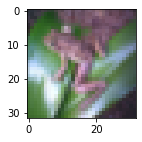

In [0]:
#plotting the image
plt.figure(figsize = (2,2))
plt.imshow(np_image)
print(classes[labels[0].item()])
plt.show()

In [0]:
# creating function to view image
def image_show(image_data):
  np_image = image_data.numpy()
  np_image = np.transpose(np_image, (1,2,0))
  plt.figure(figsize = (2,2))
  plt.imshow(np_image)
  plt.show()

automobile


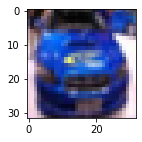

In [0]:
print(classes[labels[2].item()])
image_show(images[2])

# First Convolution Layer

In [0]:
class FirstNN(nn.Module):
  def __init__(self):
    super(FirstNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3)  #(no. of input channels, number of output channels, kernel size)
    # kernel size --> 3 = (3,3)

  def forward(self,x):
    return self.conv1(x)

In [0]:
cnn = FirstNN()
out = cnn(images)
print(out.shape)

torch.Size([4, 10, 30, 30])


(4,10,30,30) 

    4             --> number of images (batch size)

    10            --> Channels in output

    (30,30)       --> Resultant image Size

    **Default:**
    Padding = (0,0), Stride  = (1,1)


torch.Size([30, 30])


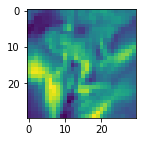

In [0]:
#image after convolution
sample = out[0,0,:,:]
print(sample.shape)
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

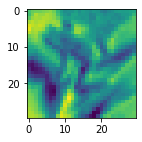

In [0]:
#2nd filter
sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

### With & without Padding & stride

In [0]:
#Padding & Stride
#By Default: Padding = (0,0) & Stride = (1,1)

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3, padding = (1,1) )  # Padding = 1,1
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

In [0]:
cnn = FirstNN()
out = cnn(images)
print(out.shape)

torch.Size([4, 10, 30, 30])


Shape is reduced to 30,30 from 32,32

In [0]:
#Stride = 1

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3, padding = (1,1), stride = (1,1) )  # Stride = 1,1
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

  
cnn = FirstCNN()
out = cnn(images)
out.shape

torch.Size([4, 10, 32, 32])

No change in shape

In [0]:
#Stride = 2

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3, padding = (1,1), stride = (2,2) )  # Stride = 2,2
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

  
cnn = FirstCNN()
out = cnn(images)
out.shape

torch.Size([4, 10, 16, 16])

Shape is reduced into half

In [0]:
#Stride = 2 without padding

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3, stride = (2,2) )  # Stride = 2,2
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

  
cnn = FirstCNN()
out = cnn(images)
out.shape

torch.Size([4, 10, 15, 15])

# Deep Convolution Networks

In [0]:
class DeepCNN(nn.Module):
  def __init__(self):
    super(DeepCNN,self).__init__()
    self.model = nn.Sequential(nn.Conv2d(3,10,3),
                               nn.Conv2d(10,5,3))
  def forward(self,x):
    return self.model(x)

### Intuition of Convolution:

Input = 4,3,32,32

    1st Convolution Layer --> Kernel = 3,3 & output channels = 10

    Default padding = 0, Stride = 1

    output, as a Result of 1st Convolution : 4,10,30,30

---

    2nd Convolution Layer --> Kernel = (3,3) & output channels = 5

    Default padding = 0, Stride = 1

    output, as a Result of 2nd Convolution :  4,5,28,28

torch.Size([4, 5, 28, 28])


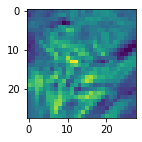

In [0]:
deep = DeepCNN()
out = deep(images)
print(out.shape)

sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [0]:
#Mean Pool or Avg pool
class avg_pool(nn.Module):
  def __init__(self):
    super(avg_pool,self).__init__()
    self.model = nn.Sequential(nn.Conv2d(3,10,3),
                              nn.Conv2d(10,5,3),
                              nn.AvgPool2d(2, stride = 2)) # Kernel size, Stride
    #Stride = 2 --> (2,2)
    
  def forward(self,x):
    y = self.model(x)
    return y

torch.Size([4, 5, 14, 14])


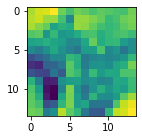

In [0]:
avg = avg_pool()
out = avg(images)
print(out.shape)

sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [0]:
#Max Pool
class max_pool(nn.Module):
  def __init__(self):
    super(max_pool,self).__init__()
    self.model = nn.Sequential(nn.Conv2d(3,10,3),
                              nn.Conv2d(10,5,3),
                              nn.MaxPool2d(2, stride = 2)) # Kernel size, Stride
    #Stride = 2 --> (2,2)
    
  def forward(self,x):
    y = self.model(x)
    return y

torch.Size([4, 5, 14, 14])


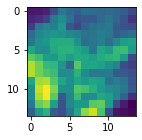

In [0]:
max_p = max_pool()
out = max_p(images)
print(out.shape)

sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

## CNN Layer

[N,3,32,32]  N --> Batch Size

      (N,3,32,32)    -->   (N,6,28,28)   -->   (N,6,14,14)   -->   (N,16,10,10)  -->  (N,16,5,5)
     1st Conv Layer         Avg. Pool         2nd Conv Layer         Avg. Pool        Dense Layer
      
      kernel = 5           kernel = 2          kernel = 5          kernel = 2
      stride = 1           stride = 2                              stride = 2

Result of flattening --> (N,16*5*5) = (N,400) # N refers to number of images loaded in a batch

Dense Layer 1: 120 Neurons

Dense Layer 2: 84 Neurons

Dense Layer 3: 10 Neurons

In [0]:
class LeNET(nn.Module):
  def __init__(self):
    super(LeNET,self).__init__()
    self.conv_model = nn.Sequential(nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5),   # (N,3,32,32) --> (N,6,28,28) 
                                    nn.Tanh(),                                               # TanH --> Activation Function
                                    nn.AvgPool2d(kernel_size=2,stride=2),                    # (N,6,28,28) --> (N,6,14,14)
                                    nn.Conv2d(6,16,5),nn.Tanh(),                             # (N,6,14,14) --> (N,16,10,10)
                                    nn.AvgPool2d(2,stride=2))                                # (N,16,10,10) --> (N,16,5,5)

    #Dense Layer
    self.dense_layer = nn.Sequential(nn.Linear(in_features=400,out_features=120),           #16*5*5 = 400 as input
                                     nn.Tanh(),
                                     nn.Linear(120,84),
                                     nn.Tanh(),
                                     nn.Linear(84,10))
  def forward(self,x):
    y = self.conv_model(x)
    #flatten the result from Conv model
    y = torch.flatten(y,1) # 1 --> dimension (N,16,5,5)
    y = self.dense_layer(y)
    return y

In [0]:
#understanding of torch.flattern
x = torch.randn(6,50,50)
print("Starts from index 0  :",torch.flatten(x).shape)
print("Starts from index 1  :",torch.flatten(x,1).shape)
print("Starts from index 2  :",torch.flatten(x,2).shape)

Starts from index 0  : torch.Size([15000])
Starts from index 1  : torch.Size([6, 2500])
Starts from index 2  : torch.Size([6, 50, 50])


# Downloading data 

## Sample 

In [0]:
batch = 4
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = torchvision.transforms.ToTensor())
trainloader1 = torch.utils.data.DataLoader(trainset, batch_size = batch, shuffle = True)
data_iter = iter(trainloader1)
images,labels = data_iter.next()
print("Shape of input  :",images.shape)
net = LeNET() 
out = net(images)
print("Shape of Output :",out.shape)

Files already downloaded and verified
Shape of input  : torch.Size([4, 3, 32, 32])
Shape of Output : torch.Size([4, 10])


In [0]:
# max value
print(torch.max(out))
# max value across each dimension, parameter --> 1
print(torch.max(out,dim=1))
max_val, preds = torch.max(out,dim=1)

tensor(0.1466, grad_fn=<MaxBackward1>)
torch.return_types.max(
values=tensor([0.1423, 0.1412, 0.1466, 0.1297], grad_fn=<MaxBackward0>),
indices=tensor([8, 8, 8, 8]))


In [0]:
print(preds)
print(labels)
(preds==labels).sum().item()

tensor([8, 8, 8, 8])
tensor([7, 8, 3, 9])


1

## Complete LeNet

In [0]:
#define batch size
batch = 256

#create new train & test data with new batch size
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = torchvision.transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch, shuffle = True)

testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = torchvision.transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size = batch, shuffle = False)
#Setting the testloader with shuffle as False to measure test accuracy

Files already downloaded and verified
Files already downloaded and verified


In [0]:
net = LeNET() 
# defining Loss function
loss_func = nn.CrossEntropyLoss()
# defining optimizer
optimizer = torch.optim.Adam(net.parameters()) 

In [0]:
def model_eval(dataloader):
  total = 0
  correct = 0
  for data in dataloader:
    images, lables = data
    out = net(images)
    max_val, preds = torch.max(out,dim=1)
    #accuracy = (correctly predicted class / total testing class) × 100%
    total += lables.shape[0]                   # class value 
    correct += (preds == lables).sum().item()  # to summ correct in the batch then sum all of it
    accuracy = (100 * correct)/total
  
  return accuracy 

In [0]:
epoch = 25

for i in range(epoch):

  for data in trainloader:
    image_data , labels = data
    optimizer.zero_grad() 
    out = net(image_data) #image_data --> input data

  train_acc = model_eval(trainloader) 
  test_acc  = model_eval(testloader)

  print("Epoch :",i," Test Accuracy : ",test_acc," Train Accuracy : ",train_acc)

Epoch : 0  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 1  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 2  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 3  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 4  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 5  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 6  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 7  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 8  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 9  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 10  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 11  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 12  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 13  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 14  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 15  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 16  Test Accuracy :  10.0  Train Accuracy :  10.0
Epoch : 17  Test Accurac